In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import seaborn as sns

#设置sns样式
sns.set(style='white',context='notebook',palette='muted')

import matplotlib.pyplot as plt

#导入数据
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [2]:
#查看形状
print(train.shape)
print(test.shape)

(891, 12)
(418, 11)


In [3]:
#train 和test合并一起处理缺失值和异常值
full = train.append(test,ignore_index=True)
full.describe()

,Age,Fare,Parch,PassengerId,Pclass,SibSp,Survived
count,1046.000000,1308.000000,1309.000000,1309.000000,1309.000000,1309.000000,891.000000
mean,29.881138,33.295479,0.385027,655.000000,2.294882,0.498854,0.383838
std,14.413493,51.758668,0.865560,378.020061,0.837836,1.041658,0.486592
min,0.170000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,21.000000,7.895800,0.000000,328.000000,2.000000,0.000000,0.000000
50%,28.000000,14.454200,0.000000,655.000000,3.000000,0.000000,0.000000
75%,39.000000,31.275000,0.000000,982.000000,3.000000,1.000000,1.000000
max,80.000000,512.329200,9.000000,1309.000000,3.000000,8.000000,1.000000


In [4]:
full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
Age            1046 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
Fare           1308 non-null float64
Name           1309 non-null object
Parch          1309 non-null int64
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Sex            1309 non-null object
SibSp          1309 non-null int64
Survived       891 non-null float64
Ticket         1309 non-null object
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


In [5]:
full.isnull().sum()

Age             263
Cabin          1014
Embarked          2
Fare              1
Name              0
Parch             0
PassengerId       0
Pclass            0
Sex               0
SibSp             0
Survived        418
Ticket            0
dtype: int64

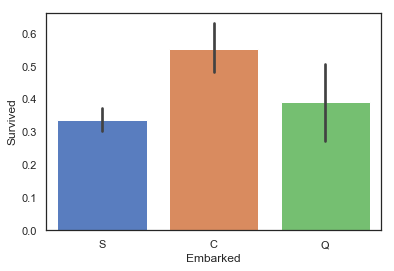

In [6]:
#各个特征与生存率之前的关系
#Embarked
sns.barplot(data = train,x='Embarked',y='Survived')

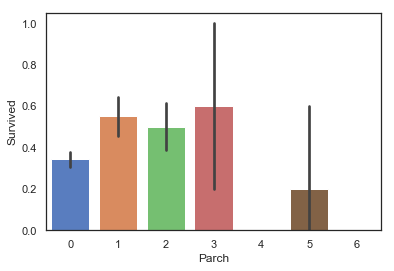

In [7]:
#parch
sns.barplot(data = train,x='Parch',y='Survived')

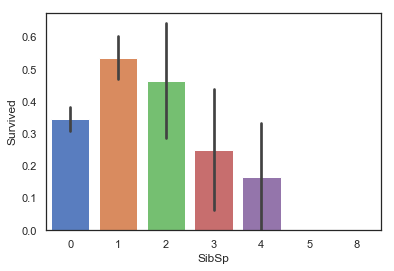

In [8]:
#sibsp
sns.barplot(data = train,x='SibSp',y='Survived')

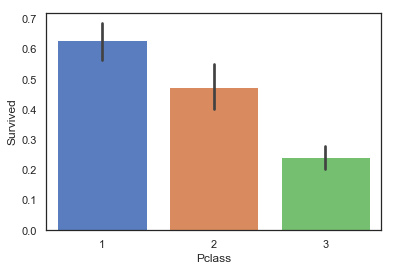

In [9]:
#pclass
sns.barplot(data = train,x='Pclass',y='Survived')

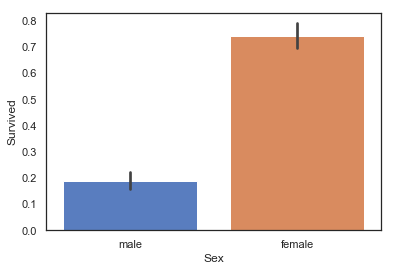

In [10]:
#sex
sns.barplot(data = train,x='Sex',y='Survived')

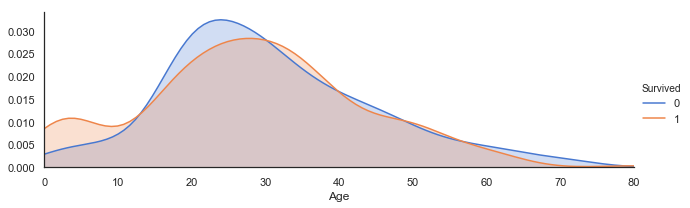

In [11]:
#age
#创建坐标系
ageFacet= sns.FacetGrid(train,hue = 'Survived',aspect =3)
#选择图类型
ageFacet.map(sns.kdeplot,'Age',shade=True)
#设置坐标轴范围
ageFacet.set(xlim = (0,train['Age'].max()))
ageFacet.add_legend()



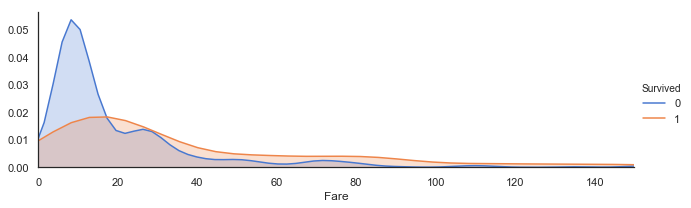

In [12]:
#fare
ageFacet= sns.FacetGrid(train,hue = 'Survived',aspect =3)
ageFacet.map(sns.kdeplot,'Fare',shade=True)
ageFacet.set(xlim = (0,150))
ageFacet.add_legend()


No handles with labels found to put in legend.


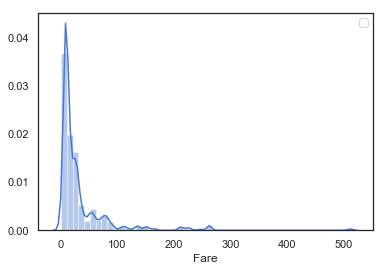

In [13]:
#查看fare分布
farePlot=sns.distplot(full['Fare'][full['Fare'].notnull()])
farePlot.legend(loc='best')

In [14]:
full['Fare']=np.log(full['Fare']+1)

No handles with labels found to put in legend.


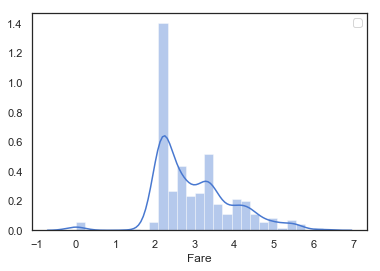

In [15]:
farePlot=sns.distplot(full['Fare'][full['Fare'].notnull()])
farePlot.legend(loc='best')

No handles with labels found to put in legend.


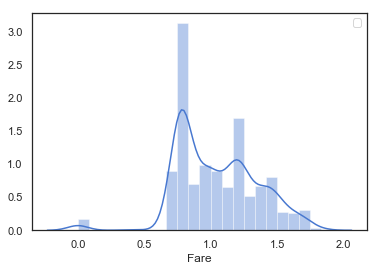

In [16]:
full['Fare']=full['Fare'].map(lambda x: np.log(x) if x>0 else 0)
farePlot=sns.distplot(full['Fare'][full['Fare'].notnull()])
farePlot.legend(loc='best')

In [17]:
#数据预处理

#carbin缺失值填充 U = unkonwn
full['Cabin'] = full['Cabin'].fillna('U')

In [18]:
#embarked
full[full['Embarked'].isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
61,38.0,B28,NaN,1.480342,"Icard, Miss. Amelie",0,62,1,female,0,1.0,113572
829,62.0,B28,NaN,1.480342,"Stone, Mrs. George Nelson (Martha Evelyn)",0,830,1,female,0,1.0,113572


In [19]:
full['Embarked'] = full['Embarked'].fillna('S')

In [20]:
full['Name'][:5]

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
Name: Name, dtype: object

In [21]:
#特征工程
#提取乘客的头衔类似 Mr,miss,mre,master,rev等等
full['Title'] = full['Name'].map(lambda x:x.split(',')[1].split('.')[0].strip())
full['Title'].value_counts()

Mr              757
Miss            260
Mrs             197
Master           61
Rev               8
Dr                8
Col               4
Ms                2
Mlle              2
Major             2
Capt              1
Dona              1
Mme               1
Don               1
the Countess      1
Lady              1
Sir               1
Jonkheer          1
Name: Title, dtype: int64

In [22]:
#将title信息进行整合
TitleDict={}
TitleDict['Mr']='Mr'
TitleDict['Mlle']='Miss'
TitleDict['Miss']='Miss'
TitleDict['Master']='Master'
TitleDict['Jonkheer']='Master'
TitleDict['Mme']='Mrs'
TitleDict['Ms']='Mrs'
TitleDict['Mrs']='Mrs'
TitleDict['Don']='Royalty'
TitleDict['Sir']='Royalty'
TitleDict['the Countess']='Royalty'
TitleDict['Dona']='Royalty'
TitleDict['Lady']='Royalty'
TitleDict['Capt']='Officer'
TitleDict['Col']='Officer'
TitleDict['Major']='Officer'
TitleDict['Dr']='Officer'
TitleDict['Rev']='Officer'

full['Title']=full['Title'].map(TitleDict)
full['Title'].value_counts()

Mr         757
Miss       262
Mrs        200
Master      62
Officer     23
Royalty      5
Name: Title, dtype: int64

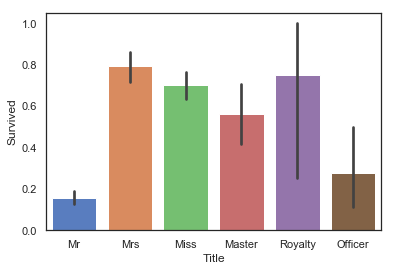

In [23]:
#name和生存的关系
sns.barplot(data=full,x='Title',y='Survived')

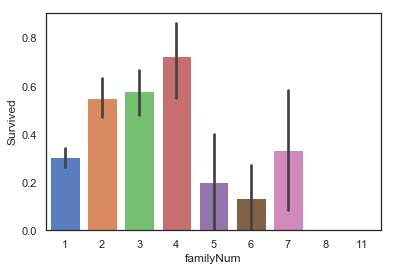

In [24]:
#家庭成员合到一起
full['familyNum'] = full['SibSp'] +full['Parch']+1
sns.barplot(data=full,x='familyNum',y='Survived')

In [25]:
#把家庭人数分类成三类

def familysize(familynum):
    if familynum ==1:
        return 0
    elif (familynum >=2 and familynum <=4):
        return 1
    else:
        return 2
    
full['familySize'] = full['familyNum'].map(familysize)
full['familySize'].value_counts()

0    790
1    437
2     82
Name: familySize, dtype: int64

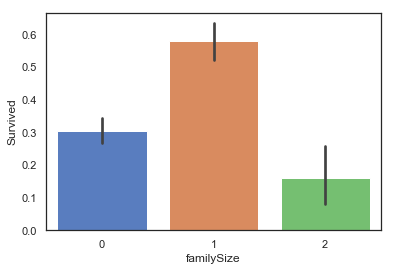

In [26]:
sns.barplot(data=full,x='familySize',y='Survived')

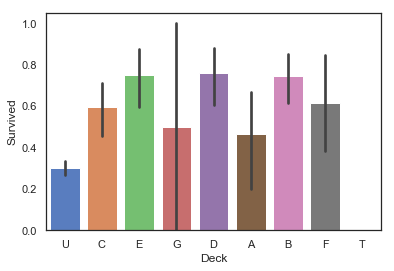

In [27]:
full['Deck'] = full['Cabin'].map(lambda x:x[0])#取首字母
sns.barplot(data=full,x='Deck',y='Survived')

In [28]:
TickCountDict={}
TickCountDict = full['Ticket'].value_counts()
TickCountDict

CA. 2343              11
CA 2144                8
1601                   8
3101295                7
347077                 7
PC 17608               7
347082                 7
S.O.C. 14879           7
347088                 6
382652                 6
19950                  6
113781                 6
113503                 5
220845                 5
349909                 5
16966                  5
PC 17757               5
4133                   5
W./C. 6608             5
36928                  4
PC 17483               4
SC/Paris 2123          4
17421                  4
W./C. 6607             4
LINE                   4
230136                 4
24160                  4
C.A. 2315              4
113760                 4
2666                   4
                      ..
229236                 1
345770                 1
PC 17476               1
363611                 1
237735                 1
9232                   1
350054                 1
348121                 1
211535                 1


In [29]:
full['TickCot']= full['Ticket'].map(TickCountDict)

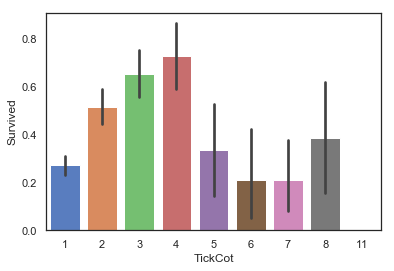

In [30]:
sns.barplot(data=full,x='TickCot',y='Survived')

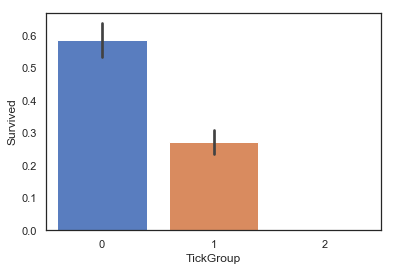

In [31]:
#按照TickCot大小，将TickGroup分为三类。
def TickCountGroup(num):
    if (num>=2)&(num<=4):
        return 0
    elif (num==1)|((num>=5)&(num<=8)):
        return 1
    else :
        return 2
#得到各位乘客TickGroup的类别
full['TickGroup']=full['TickCot'].map(TickCountGroup)
#查看TickGroup与Survived之间关系
sns.barplot(data=full,x='TickGroup',y='Survived')

In [32]:
full['Age'].isnull().sum()

263

4.2.5Age缺失值填充-构建随机森林模型预测缺失的数据

查看Age与Parch、Pclass、Sex、SibSp、Title、familyNum、familySize、Deck、TickCot、TickGroup等变量的相关系数大小，筛选出相关性较高的变量构建预测模型。

In [33]:
AgePre = full[['Age','Parch','Pclass','SibSp','Title','familyNum','TickCot']]
#进行one-hot编码
AgePre=pd.get_dummies(AgePre)
ParAge=pd.get_dummies(AgePre['Parch'],prefix='Parch')
SibAge=pd.get_dummies(AgePre['SibSp'],prefix='SibSp')
PclAge=pd.get_dummies(AgePre['Pclass'],prefix='Pclass')

In [34]:
AgePre[:5]

,Age,Parch,Pclass,SibSp,familyNum,TickCot,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Royalty
0,22.0,0,3,1,2,1,0,0,1,0,0,0
1,38.0,0,1,1,2,2,0,0,0,1,0,0
2,26.0,0,3,0,1,1,0,1,0,0,0,0
3,35.0,0,1,1,2,2,0,0,0,1,0,0
4,35.0,0,3,0,1,1,0,0,1,0,0,0


In [35]:
Agecorr = pd.DataFrame()
Agecorr = AgePre.corr()
Agecorr['Age'].sort_values()

Pclass          -0.408106
Title_Master    -0.385380
Title_Miss      -0.282977
SibSp           -0.243699
familyNum       -0.240229
TickCot         -0.185284
Parch           -0.150917
Title_Royalty    0.057337
Title_Officer    0.166771
Title_Mr         0.183965
Title_Mrs        0.215091
Age              1.000000
Name: Age, dtype: float64

In [36]:
AgePre=pd.concat([AgePre,ParAge,SibAge,PclAge],axis=1)
AgePre.head()

,Age,Parch,Pclass,SibSp,familyNum,TickCot,Title_Master,Title_Miss,Title_Mr,Title_Mrs,...,SibSp_0,SibSp_1,SibSp_2,SibSp_3,SibSp_4,SibSp_5,SibSp_8,Pclass_1,Pclass_2,Pclass_3
0,22.0,0,3,1,2,1,0,0,1,0,...,0,1,0,0,0,0,0,0,0,1
1,38.0,0,1,1,2,2,0,0,0,1,...,0,1,0,0,0,0,0,1,0,0
2,26.0,0,3,0,1,1,0,1,0,0,...,1,0,0,0,0,0,0,0,0,1
3,35.0,0,1,1,2,2,0,0,0,1,...,0,1,0,0,0,0,0,1,0,0
4,35.0,0,3,0,1,1,0,0,1,0,...,1,0,0,0,0,0,0,0,0,1


In [37]:
#数据拆分为实验集和预测集建立模型
train = AgePre[AgePre['Age'].notnull()]#train
test = AgePre[AgePre['Age'].isnull()]#test

#生成特征和标签

train_x = train.drop(['Age'],axis=1)
train_y = train['Age']


#test的特征
test_x = test.drop(['Age'],axis=1)

from sklearn.ensemble import RandomForestRegressor

tfr = RandomForestRegressor(random_state=None,n_estimators=400,n_jobs=-1)
tfr.fit(train_x,train_y)



RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=400, n_jobs=-1,
                      oob_score=False, random_state=None, verbose=0,
                      warm_start=False)

In [38]:
tfr.score(train_x,train_y)

0.5876364483079665

In [39]:
test_y = tfr.predict(test_x)
test_y.shape

(263,)

In [40]:
# full['Age'].isnull().sum()

In [41]:
full.loc[full['Age'].isnull(),['Age']] =test_y

# 4.3同组识别

虽然通过分析数据已有特征与标签的关系可以构建有效的预测模型，但是部分具有明显共同特征的用户可能与整体模型逻辑并不一致。如果将这部分具有同组效应的用户识别出来并对其数据加以修正，就可以有效提高模型的准确率。在Titancic案例中，我们主要探究相同姓氏的乘客是否存在明显的同组效应。

提取两部分数据，分别查看其“姓氏”是否存在同组效应（因为性别和年龄与乘客生存率关系最为密切，因此用这两个特征作为分类条件）：

1.12岁以上男性：找出男性中同姓氏均获救的部分；\n
2.女性以及年龄在12岁以下儿童：找出女性及儿童中同姓氏均遇难的部分。


In [42]:
full['Suname'] = full['Name'].map(lambda x:x.split(',')[0].strip())
SurName ={}
SurName = full['Suname'].value_counts()
full['SurnameNum'] = full['Suname'].map(SurName)

MaleDf=full[(full['Sex']=='male')&(full['Age']>12)&(full['familyNum']>=2)]
FemChildDf=full[((full['Sex']=='female')|(full['Age']<=12))&(full['familyNum']>=2)]

In [43]:
#分析男性同组效应
MSurNamDf=MaleDf['Survived'].groupby(MaleDf['Suname']).mean()
MSurNamDf.value_counts()

0.0    89
1.0    19
0.5     3
Name: Survived, dtype: int64

In [44]:
#获得生存率为1的姓氏
MSurdic ={}
MSurdic = MSurNamDf[MSurNamDf.values==1].index
MSurdic

Index(['Beane', 'Beckwith', 'Bishop', 'Cardeza', 'Chambers', 'Dick',
       'Duff Gordon', 'Frauenthal', 'Frolicher-Stehli', 'Goldenberg',
       'Greenfield', 'Harder', 'Hoyt', 'Kimball', 'Lindqvist', 'McCoy',
       'Nakid', 'Persson', 'Taylor'],
      dtype='object', name='Suname')

In [45]:
#分析女性及儿童同组效应
FCSurNamDf=FemChildDf['Survived'].groupby(FemChildDf['Suname']).mean()
FCSurNamDf.value_counts()

1.000000    115
0.000000     27
0.750000      2
0.333333      1
0.142857      1
Name: Survived, dtype: int64

In [46]:
#获得生存率为0的姓氏
FCSurNamDict={}
FCSurNamDict=FCSurNamDf[FCSurNamDf.values==0].index
FCSurNamDict

Index(['Ahlin', 'Arnold-Franchi', 'Barbara', 'Boulos', 'Bourke', 'Caram',
       'Danbom', 'Ford', 'Goodwin', 'Ilmakangas', 'Johnston', 'Jussila',
       'Lahtinen', 'Lefebre', 'Lobb', 'Palsson', 'Panula', 'Rice', 'Robins',
       'Rosblom', 'Sage', 'Skoog', 'Strom', 'Turpin', 'Van Impe',
       'Vander Planke', 'Zabour'],
      dtype='object', name='Suname')

# 男性数据修正为：1、性别改为女；2、年龄改为5；

女性及儿童数据修正为：1、性别改为男；2、年龄改为60。

In [48]:
# #对数据集中这些姓氏的男性数据进行修正：1、性别改为女；2、年龄改为5。
# full.loc[(full['Survived'].isnull())&(full['Suname'].isin(MSurNamDict))&(full['Sex']=='male'),'Age']=5
# full.loc[(full['Survived'].isnull())&(full['Suname'].isin(MSurNamDict))&(full['Sex']=='male'),'Sex']='female'

# #对数据集中这些姓氏的女性及儿童的数据进行修正：1、性别改为男；2、年龄改为60。
# full.loc[(full['Survived'].isnull())&(full['Suname'].isin(FCSurNamDict))&((full['Sex']=='female')|(full['Age']<=12)),'Age']=60
# full.loc[(full['Survived'].isnull())&(full['Suname'].isin(FCSurNamDict))&((full['Sex']=='female')|(full['Age']<=12)),'Sex']='male'

In [49]:
#数据的维度增加了，需要降维了

#人工筛选
fullSel=full.drop(['Cabin','Name','Ticket','PassengerId','Suname','SurnameNum'],axis=1)
#查看各特征与标签的相关性
corrDf=pd.DataFrame()
corrDf=fullSel.corr()
corrDf['Survived'].sort_values(ascending=True)

Pclass       -0.338481
TickGroup    -0.319278
Age          -0.059793
SibSp        -0.035322
familyNum     0.016639
TickCot       0.064962
Parch         0.081629
familySize    0.108631
Fare          0.329799
Survived      1.000000
Name: Survived, dtype: float64

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5]),
 <a list of 10 Text xticklabel objects>)

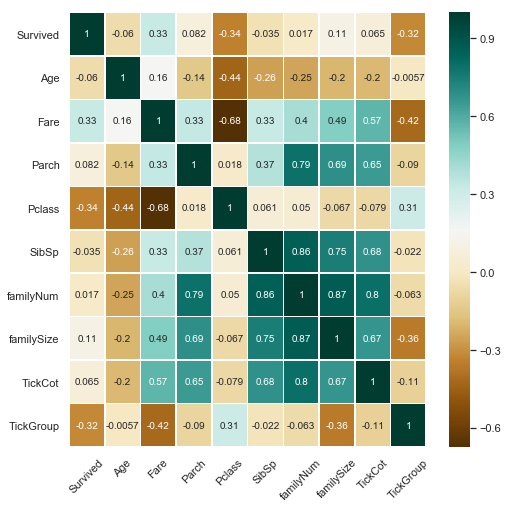

In [50]:
#热力图，查看Survived与其他特征间相关性大小
plt.figure(figsize=(8,8))
sns.heatmap(fullSel[['Survived','Age','Embarked','Fare','Parch','Pclass',
                    'Sex','SibSp','Title','familyNum','familySize','Deck',
                     'TickCot','TickGroup']].corr(),cmap='BrBG',annot=True,
           linewidths=.5)
plt.xticks(rotation=45)

In [51]:
fullSel=fullSel.drop(['familyNum','SibSp','TickCot','Parch'],axis=1)
#one-hot编码
fullSel=pd.get_dummies(fullSel)
PclassDf=pd.get_dummies(full['Pclass'],prefix='Pclass')
TickGroupDf=pd.get_dummies(full['TickGroup'],prefix='TickGroup')
familySizeDf=pd.get_dummies(full['familySize'],prefix='familySize')

fullSel=pd.concat([fullSel,PclassDf,TickGroupDf,familySizeDf],axis=1)

# 模型选择

In [52]:
#拆分实验集预测集
new_train = fullSel[fullSel['Survived'].notnull()]
new_pre = fullSel[fullSel['Survived'].isnull()]

new_train_x = new_train.drop('Survived',axis=1)
new_train_y = new_train['Survived']

new_pre_x = new_pre.drop('Survived',axis=1)

In [53]:
import xgboost as xgb
from sklearn.model_selection import train_test_split

x_train, x_test , y_train ,y_test = train_test_split(new_train_x,new_train_y,test_size=0.7,random_state=1)


In [56]:

def show_accuracy(a, b, tip):
    acc= a.ravel() == b.ravel()
    acc_rate = 100 * float(acc.sum()) / a.size
    print('%s accuracy:%.3f%%' %(tip, acc_rate))
    return acc_rate


In [57]:
data_train = xgb.DMatrix(x_train,label = y_train)
data_test = xgb.DMatrix(x_test,label = y_test)
watch_list = [(data_test, 'eval'), (data_train, 'train')]
param = {'max_depth':6, 'eta':0.8, 'silent':1, 'objective':'binary:logistic'}
bst = xgb.train(param, data_train, num_boost_round=200, evals=watch_list)
y_hat = bst.predict(data_test)
# write_result(bst, 3)
y_hat[y_hat > 0.5] = 1
y_hat[~(y_hat > 0.5)] = 0
xgb_rate = show_accuracy(y_hat, y_test, 'XGBoost')



[0]	eval-error:0.195513	train-error:0.104869
[1]	eval-error:0.189103	train-error:0.093633
[2]	eval-error:0.184295	train-error:0.071161
[3]	eval-error:0.192308	train-error:0.059925
[4]	eval-error:0.197115	train-error:0.052434
[5]	eval-error:0.197115	train-error:0.05618
[6]	eval-error:0.200321	train-error:0.052434
[7]	eval-error:0.203526	train-error:0.052434
[8]	eval-error:0.206731	train-error:0.037453
[9]	eval-error:0.213141	train-error:0.037453
[10]	eval-error:0.214744	train-error:0.026217
[11]	eval-error:0.206731	train-error:0.022472
[12]	eval-error:0.203526	train-error:0.022472
[13]	eval-error:0.203526	train-error:0.014981
[14]	eval-error:0.19391	train-error:0.014981
[15]	eval-error:0.201923	train-error:0.014981
[16]	eval-error:0.200321	train-error:0.011236
[17]	eval-error:0.200321	train-error:0.007491
[18]	eval-error:0.201923	train-error:0.011236
[19]	eval-error:0.200321	train-error:0.007491
[20]	eval-error:0.203526	train-error:0.007491
[21]	eval-error:0.203526	train-error:0.007491


[177]	eval-error:0.219551	train-error:0.003745
[178]	eval-error:0.219551	train-error:0.003745
[179]	eval-error:0.217949	train-error:0.003745
[180]	eval-error:0.217949	train-error:0.003745
[181]	eval-error:0.219551	train-error:0.003745
[182]	eval-error:0.217949	train-error:0.003745
[183]	eval-error:0.219551	train-error:0.003745
[184]	eval-error:0.217949	train-error:0.003745
[185]	eval-error:0.217949	train-error:0.003745
[186]	eval-error:0.217949	train-error:0.003745
[187]	eval-error:0.217949	train-error:0.003745
[188]	eval-error:0.217949	train-error:0.003745
[189]	eval-error:0.219551	train-error:0.003745
[190]	eval-error:0.219551	train-error:0.003745
[191]	eval-error:0.219551	train-error:0.003745
[192]	eval-error:0.219551	train-error:0.003745
[193]	eval-error:0.221154	train-error:0.003745
[194]	eval-error:0.219551	train-error:0.003745
[195]	eval-error:0.217949	train-error:0.003745
[196]	eval-error:0.219551	train-error:0.003745
[197]	eval-error:0.219551	train-error:0.003745
[198]	eval-er